<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/Amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Amazon Reviewss data with rating.csv to Amazon Reviewss data with rating.csv


In [3]:
df = pd.read_csv("Amazon Reviewss data with rating.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Reviews    1998 non-null object
Ratings    2000 non-null object
dtypes: object(2)
memory usage: 31.3+ KB


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Explore Data


In [5]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(2000, 2)

pandas.core.frame.DataFrame

4000

(2000, 2)

,Reviews,Ratings
0,Best Display in Market!,5.0 out of 5 stars
1,Awesome purchase,5.0 out of 5 stars
2,Picture Quality and Slow Motion Video Recordin...,2.0 out of 5 stars
3,Overpriced to the cheap quality,1.0 out of 5 stars
4,Unhappy with one plus,3.0 out of 5 stars


,Reviews,Ratings
1995,waste of money,1.0 out of 5 stars
1996,"The smooth and seamless performance, immersive...",5.0 out of 5 stars
1997,Excellent phone,5.0 out of 5 stars
1998,Display problem,1.0 out of 5 stars
1999,Great mobile,5.0 out of 5 stars


In [6]:
df.Ratings.value_counts()

5.0 out of 5 stars    1254
4.0 out of 5 stars     362
1.0 out of 5 stars     199
3.0 out of 5 stars     117
2.0 out of 5 stars      68
Name: Ratings, dtype: int64

In [0]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

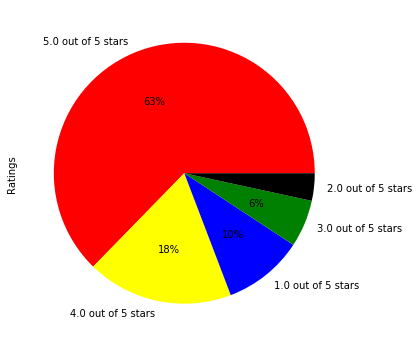

In [8]:
df.Ratings.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow","blue","green","black"])

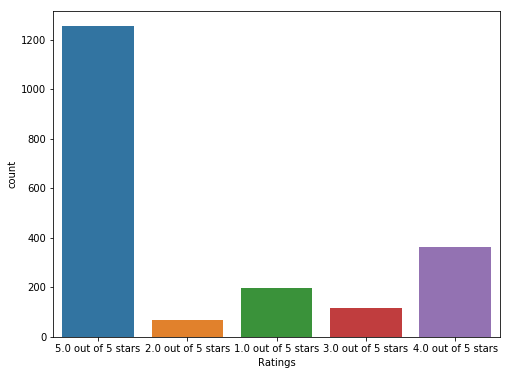

In [9]:
sns.countplot(x = 'Ratings',data=df)

In [0]:
text = []
f_in = open("Amazon Reviewss data with rating.csv",'r')
for line in f_in.readlines():
    text.append(line)
f_in.close()

In [0]:
corpus = [] #Create an empty corpus
ps = PorterStemmer() # For Stemming the words to original form
stop_words = set(stopwords.words('english')) # removes words like will, i, and, it etc
for i in range(0,1000):
  #removes handles (@), numbers, urls emojis and any other special charcters to have only text
  text_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", ' ',text[i])
  # Convert all words to lower case
  text_cln = text_cln.lower()
  # Split sentences in to words
  text_cln = text_cln.split()
  # Remove english stopwords
  text_cln = [x for x in text_cln if not x in stop_words]
  # Lemmatize words to the base form
  wn = nltk.WordNetLemmatizer()
  text_cln = [wn.lemmatize(x) for x in text_cln]
  # Join words to form the original sentence, but cleaned-up
  text_cln = " ".join(text_cln)
  #Append to the list to get all the tweets in one place
  corpus.append(text_cln)

In [13]:
#Clean Corpus
corpus[0:5]

['review rating',
 'best display market star',
 'awesome purchase star',
 'picture quality slow motion video recording blanking problem star',
 'overpriced cheap quality star']

In [14]:
#Strip the records and create a word list for each text
word_list = []
for record in (corpus):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
word_list 

[['review', 'rating'],
 ['best', 'display', 'market', 'star'],
 ['awesome', 'purchase', 'star'],
 ['picture',
  'quality',
  'slow',
  'motion',
  'video',
  'recording',
  'blanking',
  'problem',
  'star'],
 ['overpriced', 'cheap', 'quality', 'star'],
 ['unhappy', 'one', 'plus', 'star'],
 ['pay', 'happiness', 'star'],
 ['ok', 'consider', 'rd', 'option', 'buy', 'star'],
 ['go', 'star'],
 ['battery', 'life', 'star'],
 ['receive', 'complete', 'product', 'star'],
 ['wow', 'excellent', 'mobile', 'star'],
 ['flagship', 'killer', 'flagship', 'detailed', 'review', 'star'],
 ['display', 'problem', 'star'],
 ['worst', 'phone', 'experience', 'ever', 'star'],
 ['k', 'headphone', 'star'],
 ['first', 'day', 'oneplus', 'pro', 'many', 'issue', 'star'],
 ['go', 'camera', 'lover', 'star'],
 ['running', 'rampant', 'star'],
 ['poor', 'camera', 'star'],
 ['worth', 'price', 'waste', 'star'],
 ['oneplus', 'cherry', 'top', 'cake', 'star'],
 ['poor', 'camera', 'quality', 'poor', 'battery', 'backup', 'star'],

In [0]:
bagofwords = []
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [16]:
bagofwords[2]

['awesome', 'purchase', 'star']

In [17]:
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['review', 'rating', 'best', 'display', 'market', 'star', 'awesome', 'purchase', 'star', 'picture']

Most commonly occuring words and frequency



[('star', 1008),
 ('phone', 222),
 ('best', 96),
 ('one', 86),
 ('oneplus', 74),
 ('pro', 69),
 ('good', 69),
 ('flagship', 67),
 ('camera', 61),
 ('plus', 57),
 ('worth', 50),
 ('awesome', 47),
 ('great', 47),
 ('buy', 46),
 ('money', 40),
 ('product', 37),
 ('beast', 37),
 ('mobile', 36),
 ('amazing', 34),
 ('review', 32)]

In [18]:
freq_word_df = pd.DataFrame(words_freq.most_common(15), columns=['Words','Freq'])
freq_word_df.head()

,Words,Freq
0,star,1008
1,phone,222
2,best,96
3,one,86
4,oneplus,74


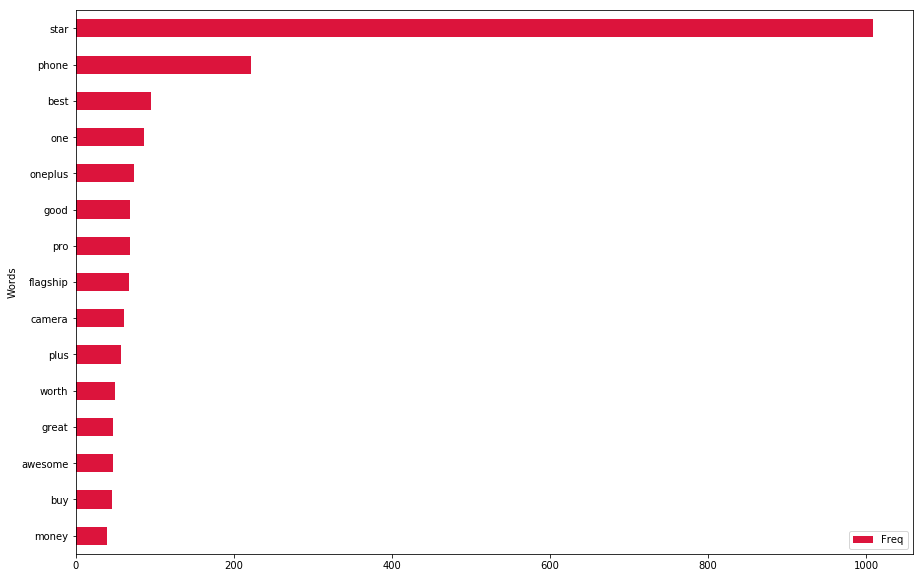

In [19]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='Words', y = 'Freq', ax=ax, color = "CRIMSON")
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string= " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                          background_color='WHITE',
                      max_words=20
                         ).generate(word_string)

<Figure size 1080x1440 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

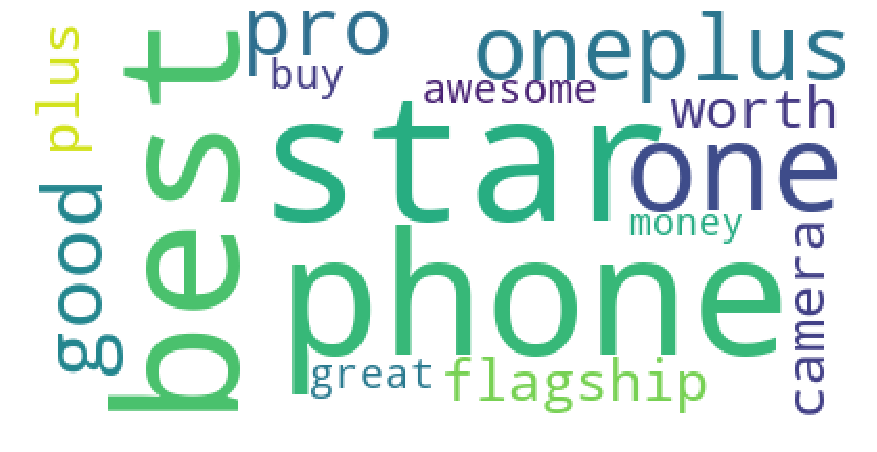

In [21]:
plt.figure(figsize=(15,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
sentiment_text = [TextBlob(text) for text in corpus]
print(sentiment_text[5].polarity)
print(sentiment_text[5])

-0.6
unhappy one plus star


In [30]:
sentiments = [[text.sentiment.polarity, str(text)] for text in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns = ["Polarity", "text"])
sentiment_df.sort_values(by= 'Polarity', ascending=False)

,Polarity,text
291,1.00,excellent phone star
750,1.00,nothing perfect still packed lot feature make ...
773,1.00,best phone star
337,1.00,perfect pro star
242,1.00,best one plus yet star
765,1.00,best one segment star
518,1.00,awesome phone star
405,1.00,superb device star
519,1.00,best display phone star
534,1.00,best smartphone time period star


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bba943b00>],
      dtype=object)

<function matplotlib.pyplot.title>

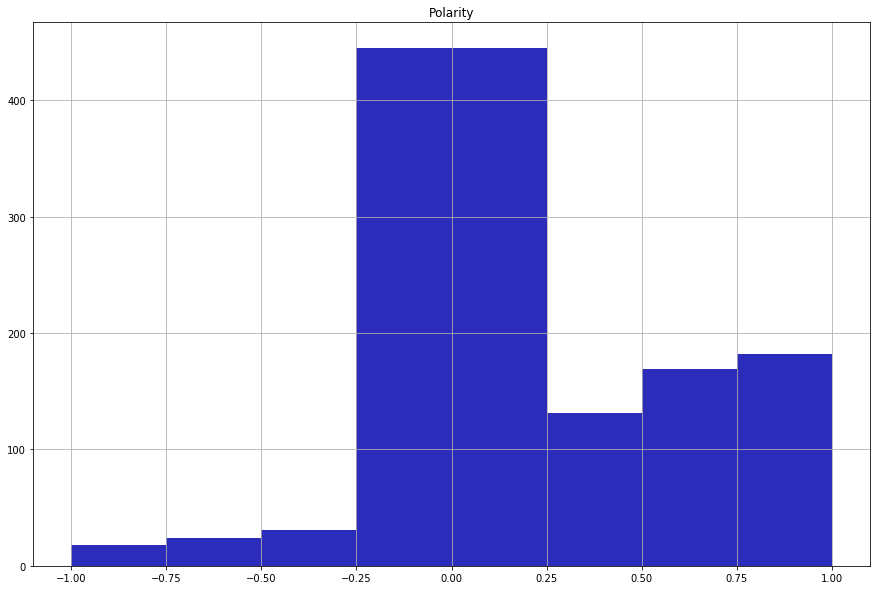

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
#Plot the histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color = '#2B2CBA')
plt.title

In [22]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111.csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [25]:
print(lexicons)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [0]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
strength = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)
#print(strength)

In [34]:
import pandas as pd
senti_matrix = pd.DataFrame(strength,text)

ValueError: ignored